In [1]:
'''
Pandas는 Panel Datas의 약자
파이썬을 이용한 데이터분석에서 가장 많이 사용되는 라이브러리
Numpy를 기반으로 만들어짐
1) Series - 벡터구조
2) DataFrame - 매트릭스구조
3) Panel : 우리의 대상 아님
::
우리가 앞으로 가져다 쓸 데이터는 거의 다 이차원 배열구조
테이블 형식의 데이터... 엑셀

Q1. 왜 엑셀을 바로 가져다가 데이터 분석에 사용하지 않습니까?
- 엑셀은 프로그램이 아니다
- 데이터분석을 위한 강력한 라이브러리를 쓸 수 없다
- Python은 데이터 분석을 위한 강력한 라이브러리가 존재
'''

## Series
### 시리즈 생성, 구조확인

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
# 1. 시리즈 생성
ser1 = Series?

In [4]:
# 시리즈는 인덱스를 명시적으로 지정하지 않으면 자동으로 0~N-1까지의 정수로 지정
np.random.seed(0)
ser1 = Series(np.random.randint(10,20,5), index=list('abcde'))
ser1
# index 속성 : 인덱스만 ndarray로 출력
print(ser1.index)
# values 속성 : 값만 ndarray출력
print(ser1.values)
# dtype 속성 : np배열 기반이므로 동일한 자료형만 담을 수 있다

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[15 10 13 13 17]


### 시리즈 값 조회하기

In [5]:
'''
단일값, 여러값을 선택할 때
1) 인덱스로 지정 -- [1:4] ---> 마지막 숫자 포함 안 함
2) 라벨로 지정 -- ['a':'c'] ---> 마지막 라벨 포함
'''
print(ser1[1:4])
print(ser1['b':'d'])

b    10
c    13
d    13
dtype: int32
b    10
c    13
d    13
dtype: int32


### 응용 조회

In [6]:
ser1_1 = ser1[:] # 전체
print(ser1_1)

ser1_1=ser1[::-1] # 역순
print(ser1_1)

ser1_1=ser1[::1]
print(ser1_1)

ser1_1=ser1[::2] # step2
print(ser1_1)

a    15
b    10
c    13
d    13
e    17
dtype: int32
e    17
d    13
c    13
b    10
a    15
dtype: int32
a    15
b    10
c    13
d    13
e    17
dtype: int32
a    15
c    13
e    17
dtype: int32


### 시리즈 간 연산과 누락데이터(결측값, null, NaN) 처리

In [7]:
# 1. 누락데이터 존재
print(ser1)
print(ser1_1)

result=ser1+ser1_1
result
# NaN = float64... 그래서 타입 변경

a    15
b    10
c    13
d    13
e    17
dtype: int32
a    15
c    13
e    17
dtype: int32


a    30.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64

In [10]:
# 2. isnull() notnull() 누락데이터 조회
result
print(result.isnull()) # 누락데이터면 True
print('*'*30)
print(result.notnull()) # 누락데이터면 False
print('*'*30)
print(result.isnull().sum()) # 누락데이터 개수 알기
print('*'*30)
# 조건부 슬라이싱을 활용
# result[result.isnull()==1]=-9
print(result[result.isnull()==1])
print(result[result.isnull()==0])

a    False
b     True
c    False
d     True
e    False
dtype: bool
******************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
******************************
2
******************************
b   NaN
d   NaN
dtype: float64
a    30.0
c    26.0
e    34.0
dtype: float64


### Series값을 이용한 시각화

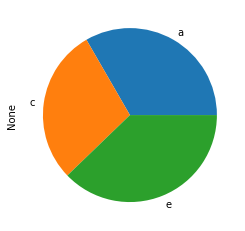

In [25]:
'''
누락데이터를 제외한 분포 확인

누락데이터는 Numeric이 아니기에 나타나지 않음
'''
result[result.notnull()].plot(kind='pie')
plt.show()

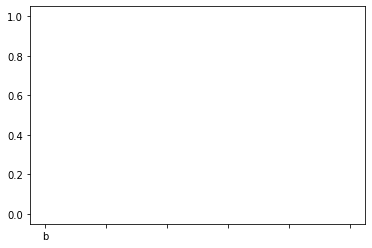

In [18]:
result[result.isnull()].plot(kind='line')
plt.show()